In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import scipy
import numpy as np
import seaborn as sns

In [50]:
# data1 = pd.read_csv("../device-1-sizepayload-6-msg-200/dados.csv")
# data1["device"] = 1
# data1["size"] = 6

data2 = pd.read_csv("../device-1-sizepayload-256-msg-200/dados.csv")
data2["device"] = 1
data2["size"] = 256

# data3 = pd.read_csv("../device-5-sizepayload-6-msg-200/dados.csv")
# data3["device"] = 5
# data3["size"] = 6

data4 = pd.read_csv("../device-5-sizepayload-256-msg-200/dados.csv")
data4["device"] = 5
data4["size"] = 256



data6 = pd.read_csv("../device-10-sizepayload-256-msg-100/dados.csv")
data6["device"] = 10
data6["size"] = 256

data7 = pd.read_csv("../device-20-sizepayload-256-msg-200/dados.csv")
data7["device"] = 20
data7["size"] = 256

# data7 = pd.read_csv("../device-50-sizepayload-6-msg-200/dados.csv")
# data7["device"] = 50
# data7["size"] = 6

data8 = pd.read_csv("../device-50-sizepayload-256-msg-200/dados.csv")
data8["device"] = 50
data8["size"] = 256


# data9 = pd.read_csv("../device-100-sizepayload-6-msg-200/dados.csv")
# data9["device"] = 100
# data9["size"] = 6

data10 = pd.read_csv("../device-100-sizepayload-256-msg-200/dados.csv")
data10["device"] = 100
data10["size"] = 256


# data = [data1,data3,data4, data5, data6, data7,data8,data9,data10]
data = [data2,data4, data6, data7, data8,data10]


In [51]:
reg = pd.concat(data)
reg.reset_index(inplace=True)

<Axes: xlabel='RTT'>

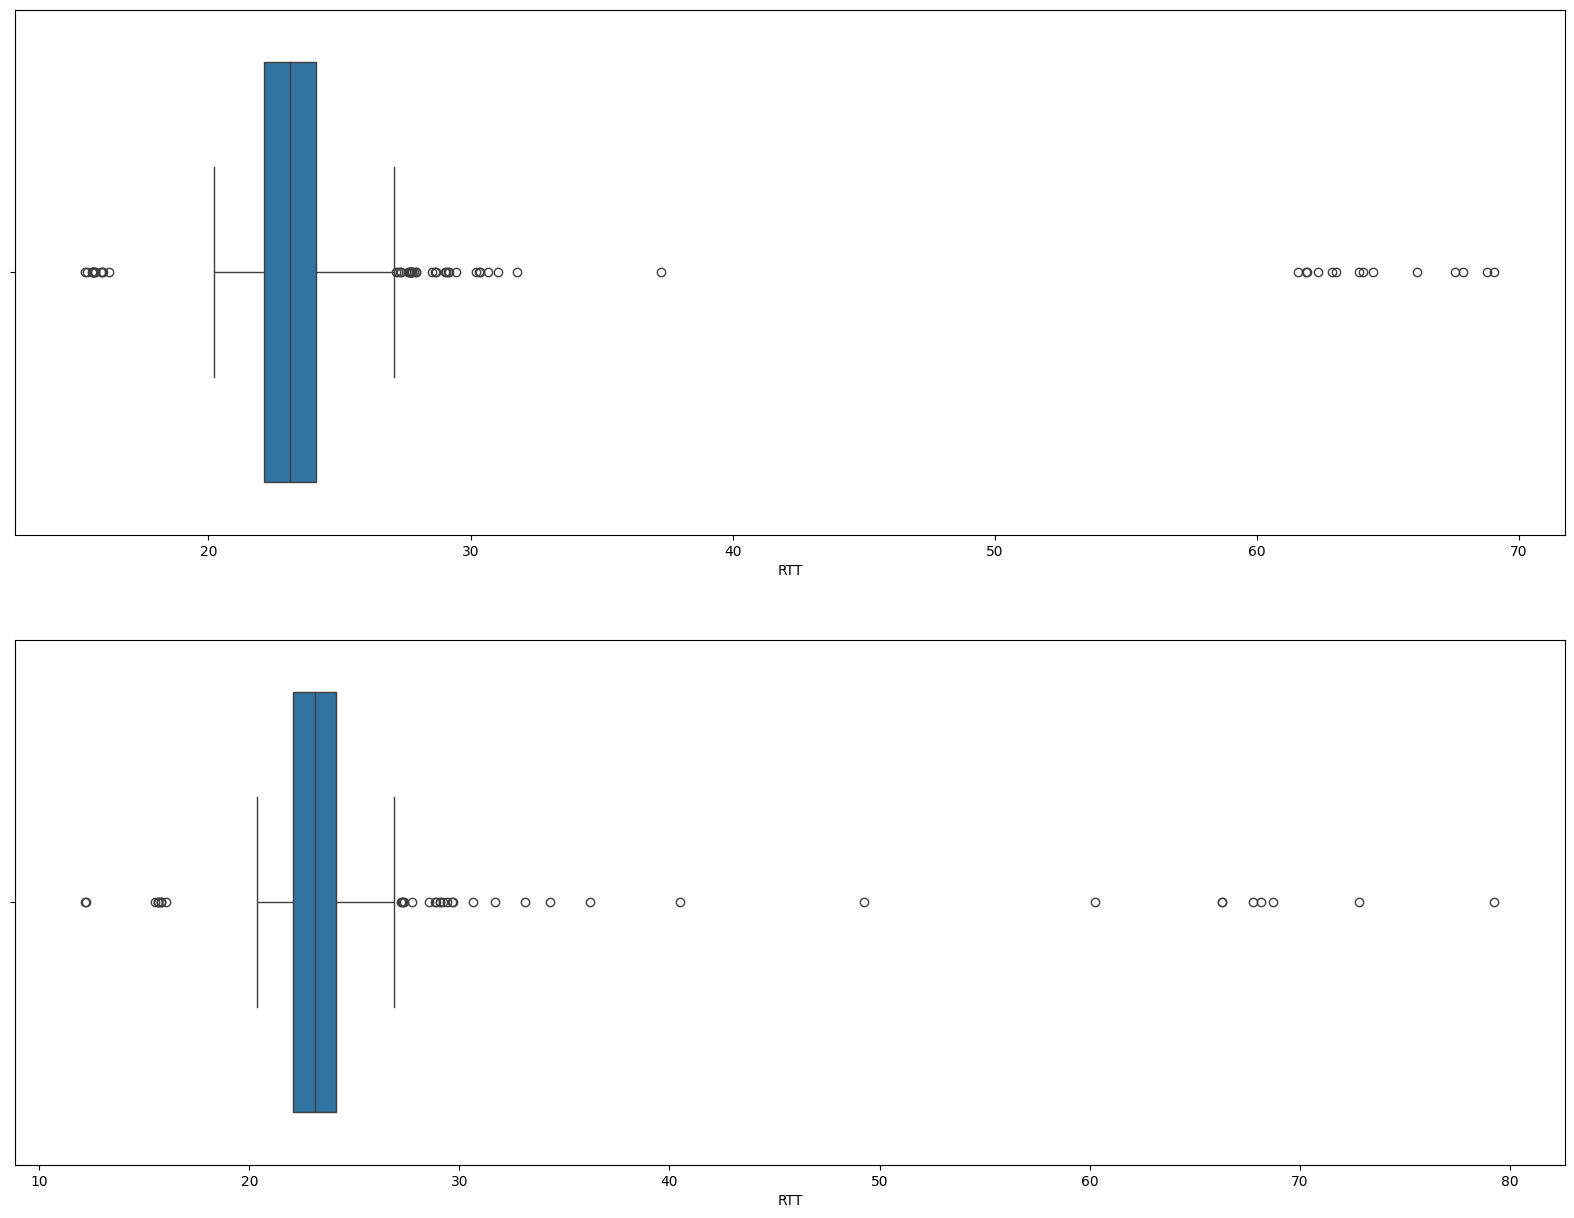

In [52]:
fig, axes = plt.subplots(2, 1, figsize=(20, 15))

sns.boxplot(ax=axes[0],data=data10, x="RTT")
sns.boxplot(ax=axes[1], data=data8, x="RTT")
# sns.boxplot(ax=axes[2], data=data3, x="RTT")
# sns.boxplot(ax=axes[3], data=data4, x="RTT")




In [53]:
q3, q1 = np.percentile(reg["RTT"], [75, 25])
interquartil = q3 - q1
limite_superior =q3 + 1.5 * interquartil
limite_inferior = q1 - 1.5 * interquartil 
price = []
df_novo = reg.loc[((reg["RTT"]>limite_inferior) & (reg["RTT"]<limite_superior))]
dados_excluidos = reg["RTT"].shape[0] - len(df_novo)
print("Nossa nova média é {}" .format(np.mean(df_novo["RTT"])))
print("Foram eliminados o total de {} outliers"  .format(dados_excluidos))
media =np.mean(df_novo["RTT"])

Nossa nova média é 23.10800850709281
Foram eliminados o total de 142 outliers


In [54]:
df_novo.corr().round(4)

,index,RTT,device,size
index,1.0000,0.0646,0.6082,NaN
RTT,0.0646,1.0000,0.0022,NaN
device,0.6082,0.0022,1.0000,NaN
size,NaN,NaN,NaN,NaN


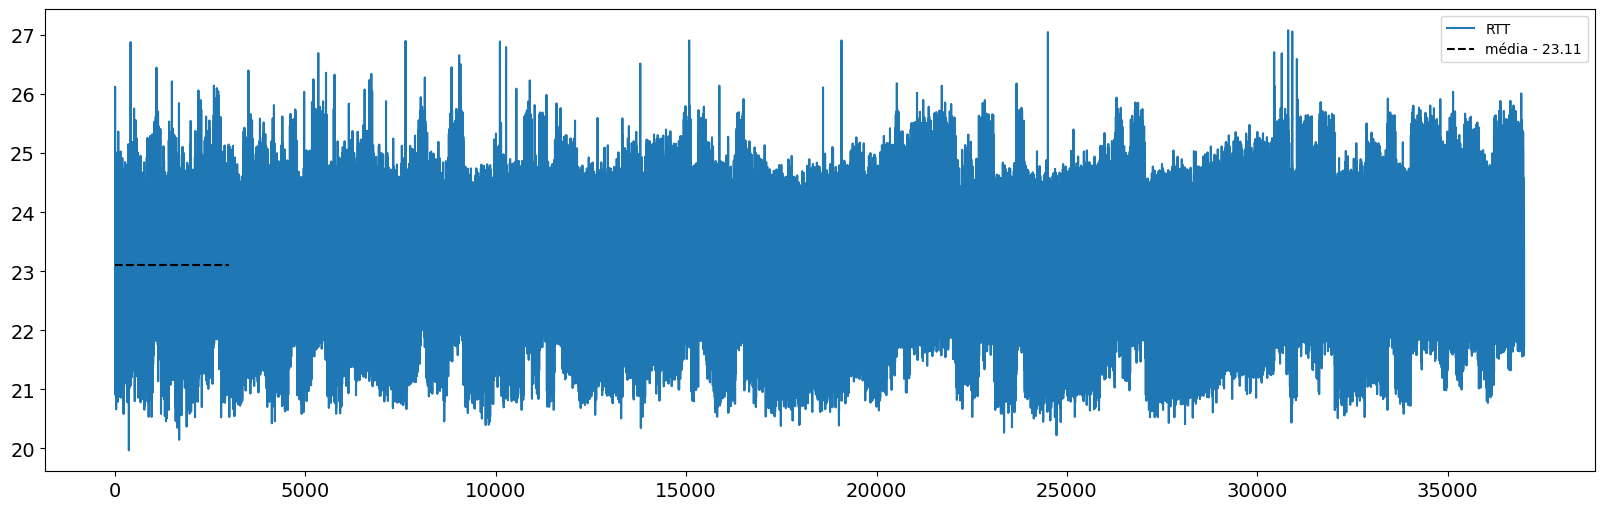

In [55]:

fig, ax = plt.subplots(figsize=(20, 6))
ax = df_novo['RTT'].plot(fontsize=14)
ax.hlines((df_novo['RTT'].mean()), xmax=3000, xmin=0, linestyles="dashed", color="black" , label="média - {}".format(round(df_novo['RTT'].mean(),2)))
ax.legend()


<Axes: xlabel='RTT'>

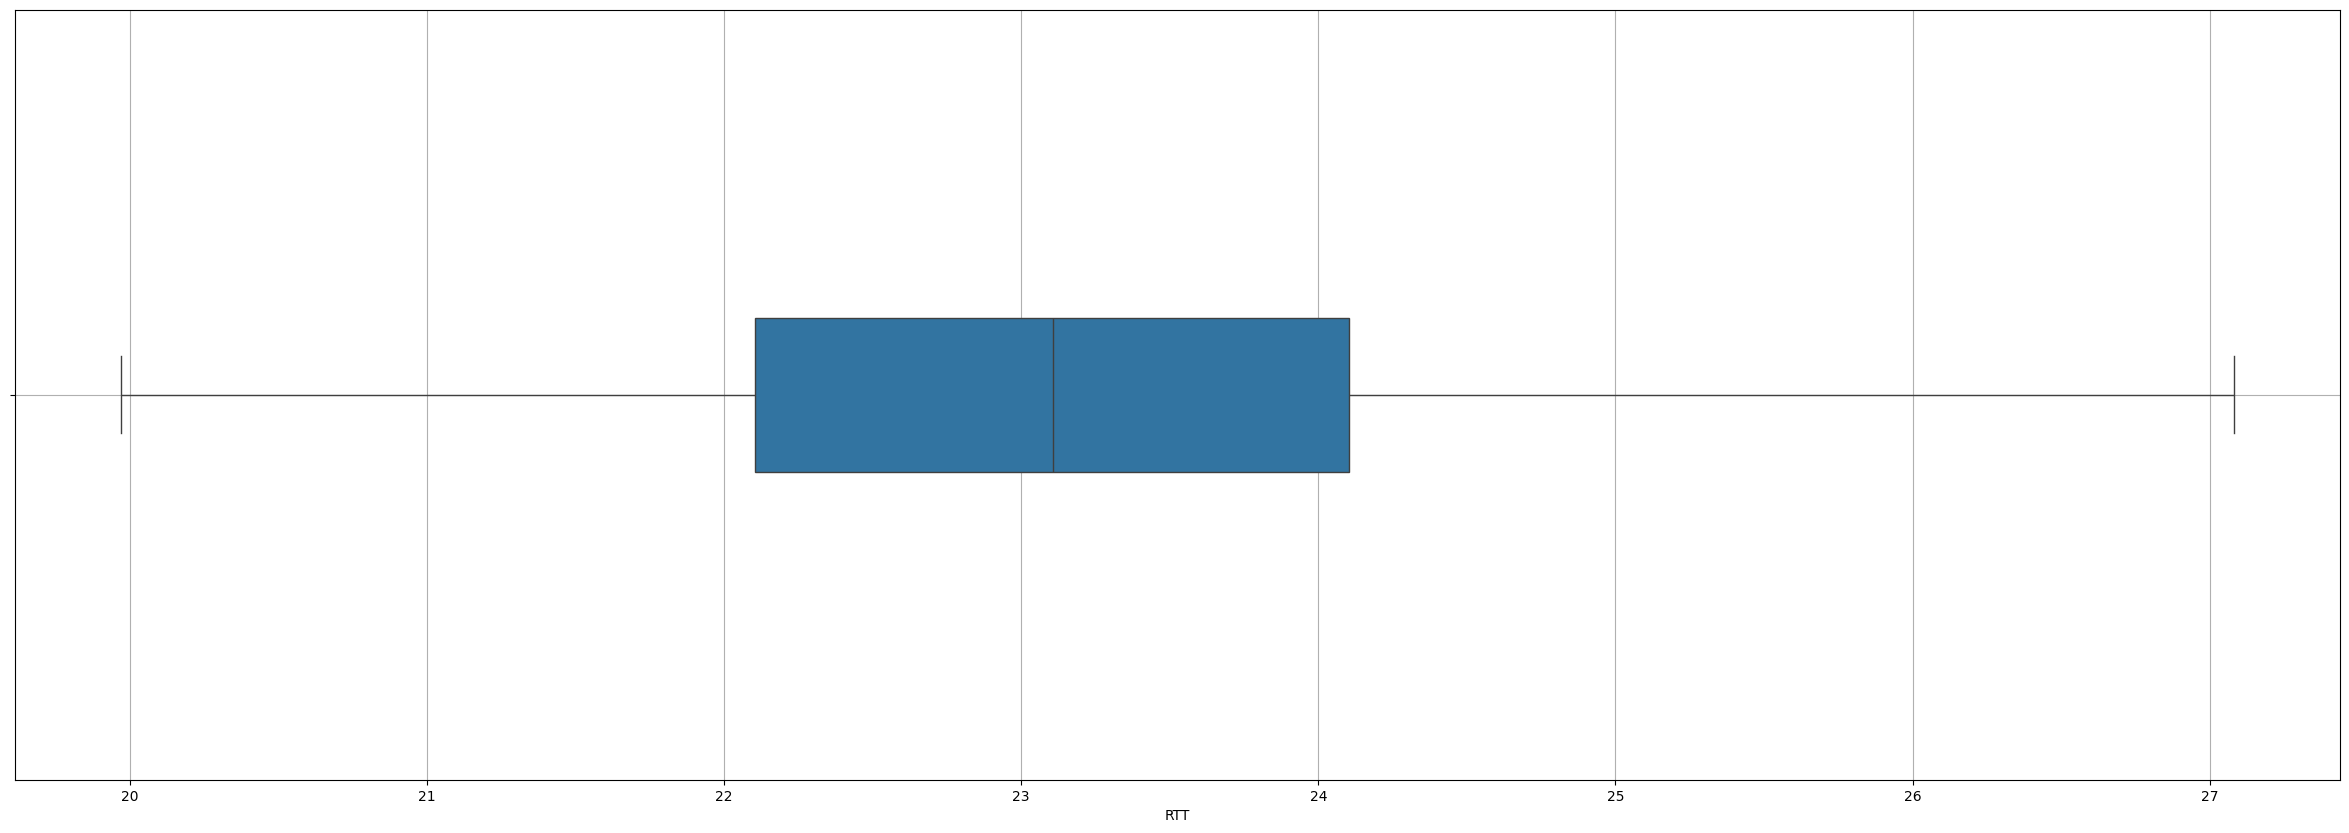

In [56]:

ax = sns.boxplot(data=df_novo['RTT'], orient='h', width=0.2)
ax.figure.set_size_inches(30, 10)
ax.grid()


ax


In [57]:
from sklearn.model_selection import train_test_split


In [58]:
y = df_novo["RTT"]

In [59]:
X = df_novo[['device', 'size']]


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)


In [61]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [62]:
modelo = LinearRegression()


In [63]:
modelo.fit(X_train, y_train)


LinearRegression()

In [64]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))


R² = 0.0


In [65]:
y_previsto = modelo.predict(X_test)


In [66]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))


R² = 0.0


In [67]:
X_test

,device,size
6253,20,256
34597,100,256
989,5,256
34339,100,256
26966,100,256
...,...,...
15174,50,256
3849,20,256
28854,100,256
1494,10,256


In [69]:
reg.loc[1866]

index     672.000000
RTT        24.069148
device     10.000000
size      256.000000
Name: 1866, dtype: float64

In [74]:
device=100
Size_Payload=256
entrada=[[device, Size_Payload]]
modelo.predict(entrada)

/home/joao/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([23.10959915])

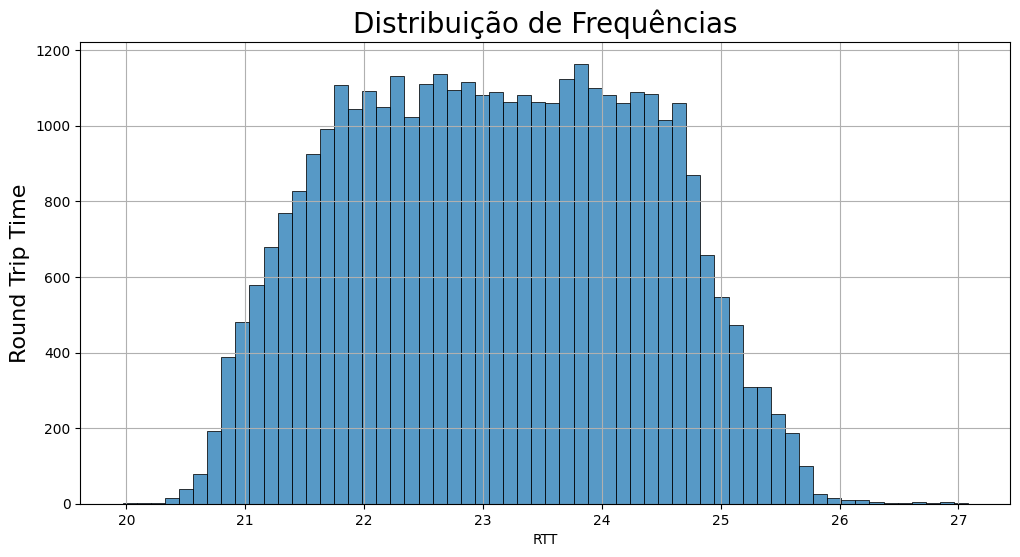

In [71]:
ax = sns.histplot(df_novo['RTT'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Round Trip Time', fontsize=16)
ax.grid()
ax;